# Assigment 2 Overview
In this assignment, we are asked to train a few decision tree classifiers on the Breast cancer wisconsin (diagnostic) dataset available in Scikit-Learn and compare their performances.

We will develop Python code for classification tasks. We will use Grid Search and crossvalidation to find the optimal hyperparameters of the model and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.

# Get the Data

In [36]:
from sklearn.datasets import load_breast_cancer


data, target = load_breast_cancer(return_X_y=True, as_frame=True)

# class 0: malignant
# class 1: benign

In [37]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Preprocessing

## D1

In [38]:
# data = data.reindex(sorted(data.columns), axis=1)  # type: ignore
reordered_data = data[sorted(data.columns)]

In [39]:
reordered_data

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.30010,0.07871,...,2019.0,0.66560,0.2654,0.7119,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.08690,0.05667,...,1956.0,0.18660,0.1860,0.2416,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.19740,0.05999,...,1709.0,0.42450,0.2430,0.4504,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.24140,0.09744,...,567.7,0.86630,0.2575,0.6869,0.17300,98.87,14.910,0.20980,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.19800,0.05883,...,1575.0,0.20500,0.1625,0.4000,0.07678,152.20,22.540,0.13740,0.2364,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,158.70,0.02891,0.02454,0.05198,0.004239,1479.0,0.11590,0.13890,0.24390,0.05623,...,2027.0,0.21130,0.2216,0.4107,0.07115,166.10,25.450,0.14100,0.2060,26.40
565,99.04,0.02423,0.01678,0.03950,0.002498,1261.0,0.10340,0.09791,0.14400,0.05533,...,1731.0,0.19220,0.1628,0.3215,0.06637,155.00,23.690,0.11660,0.2572,38.25
566,48.55,0.03731,0.01557,0.04730,0.003892,858.1,0.10230,0.05302,0.09251,0.05648,...,1124.0,0.30940,0.1418,0.3403,0.07820,126.70,18.980,0.11390,0.2218,34.12
567,86.22,0.06158,0.01664,0.07117,0.006185,1265.0,0.27700,0.15200,0.35140,0.07016,...,1821.0,0.86810,0.2650,0.9387,0.12400,184.60,25.740,0.16500,0.4087,39.42


In [40]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id,
    tight_layout=True,
    fig_extension="png",
    resolution=300,
    bbox_inches="tight",
    pad_inches=0.3,
    **kwargs,
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(
        path,
        format=fig_extension,
        dpi=resolution,
        bbox_inches=bbox_inches,
        pad_inches=pad_inches,
        **kwargs,
    )

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2050x2000 with 0 Axes>

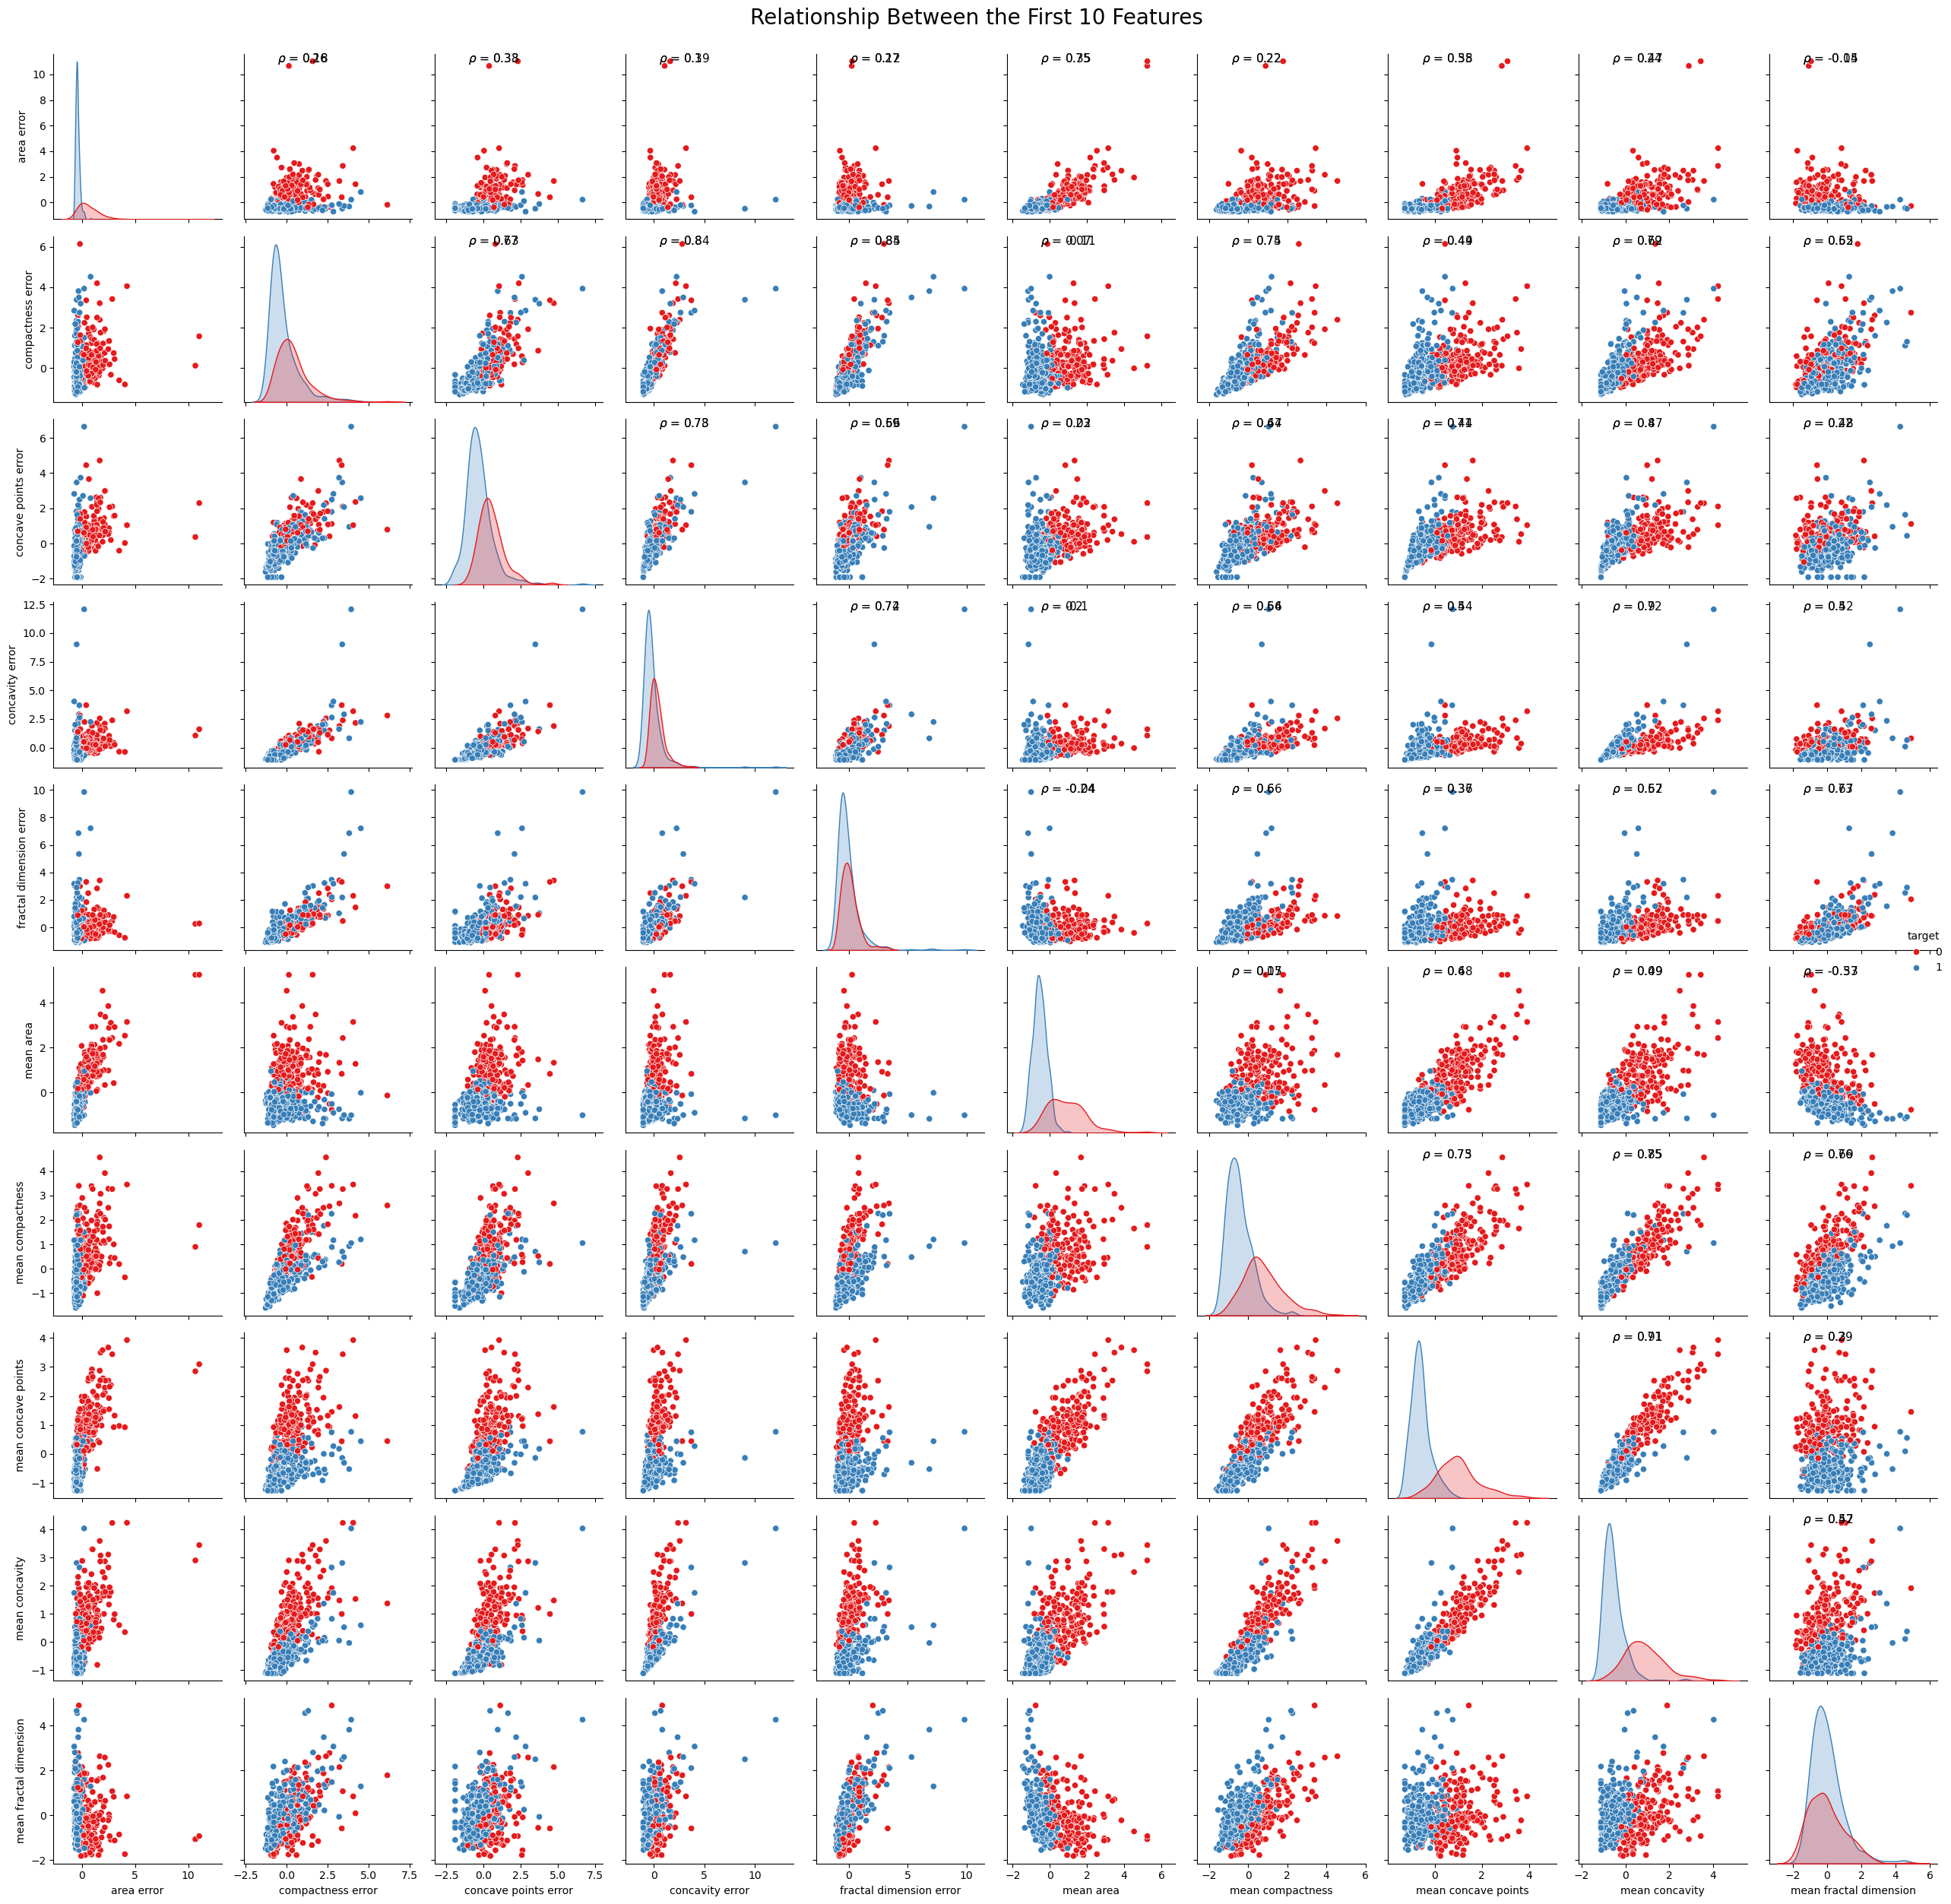

In [42]:
# Reference: https://medium.com/@tutorialcreation81/exploratory-data-analysis-of-breast-cancer-dataset-8c4cd7712f6f
# https://indianaiproduction.com/seaborn-pairplot/
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166


# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=11, xycoords=ax.transAxes)


def pair_plot_features(y: pd.DataFrame, X: pd.DataFrame, start: int, stop: int):
    """
    perform pair plot on set of variables

    args:
        y (pd.DataFrame): dataframe of dependent variable
        X (pd.DataFrame): dataframe of independent variable
        start (int): where to start in independent variables
        stop (int): where to stop in independent variables

    returns:
        pair plots of set of features from start to stop
    """
    data = X.copy()
    data_n_2 = (data - data.mean()) / (data.std())  # standardization
    data = pd.concat([y, data_n_2.iloc[:, start:stop]], axis=1)
    plt.figure(figsize=(20.5, 20))
    grid = sns.pairplot(data=data, kind="scatter", hue="target", palette="Set1")
    grid = grid.map_upper(corr)
    grid.figure.suptitle("Relationship Between the First 10 Features", y=1, fontsize=20)


pair_plot_features(
    target.to_frame(), reordered_data.iloc[:, :10], 0, 10
)  # type: ignore
save_fig("d1")

## D3

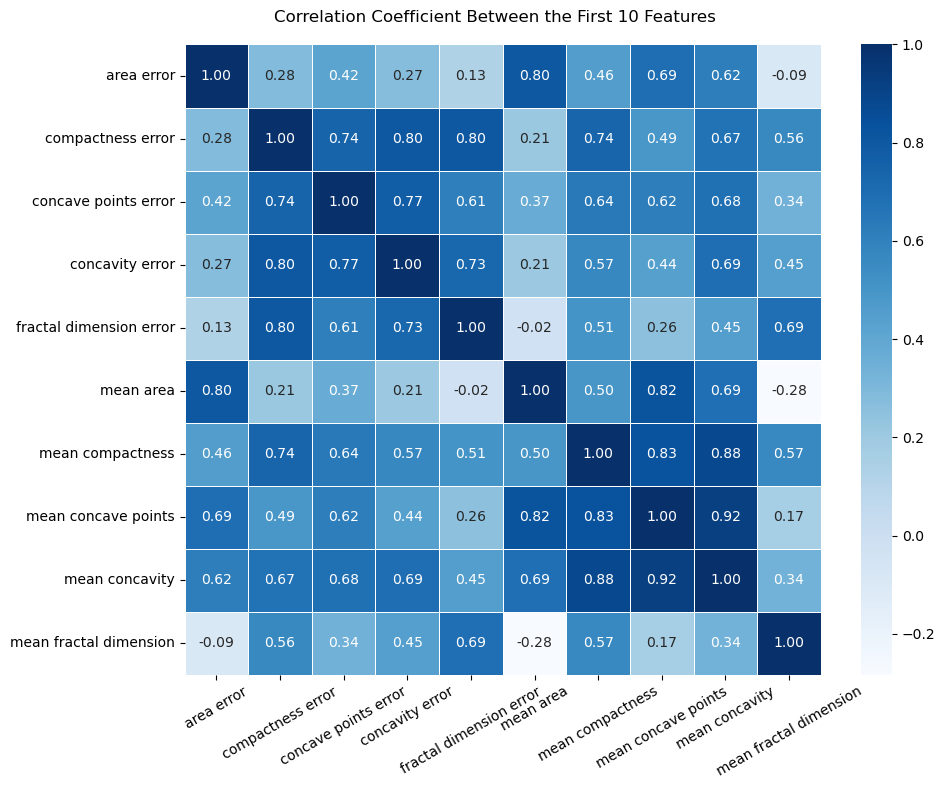

In [43]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html


# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle("Correlation Coefficient Between the First 10 Features")
    sns.heatmap(corrmat, annot=True, linewidths=0.5, fmt=".2f", ax=ax, cmap="Blues")
    plt.xticks(rotation=30)


plot_correlation_heatmap(reordered_data.iloc[:, :10])
save_fig("d3")

## D5

In [44]:
columns_to_drop = [
    "mean perimeter",
    "mean radius",
    "worst radius",
    "worst perimeter",
    "radius error",
]

data, target = load_breast_cancer(return_X_y=True, as_frame=True)

data = data.drop(columns_to_drop, axis=1)

In [45]:
data

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,perimeter error,...,symmetry error,fractal dimension error,worst texture,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,8.589,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,3.445,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,5.438,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,7.673,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,5.203,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,3.425,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,5.772,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Fitting a Decision Tree Model with Default Hyperparameters

## Split the Data

In [46]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=5508
)

## D6

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_cm_and_table(
    figure_title,
    figure_name,
    confusion_matrix,
    table_content,
    row_labels,
    col_labels,
    bottom_text=None,
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.axis("off")
    ax1.axis("tight")
    ax1.margins(x=0, y=0)
    table = ax1.table(
        cellText=table_content,
        rowLabels=row_labels,
        colLabels=col_labels,
        loc="center",
        cellLoc="center",
    )
    # Adjust font size
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    # Adjust cell heights and widths
    table.scale(0.9, 6)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[0, 1]
    )
    disp.plot(ax=ax2, cmap="Blues")
    ax2.set_title("Confusion Matrix (Test Set)")

    fig.suptitle(figure_title, fontsize="xx-large")

    if bottom_text:
        fig.text(
            0.50,
            0.01,
            bottom_text,
            horizontalalignment="center",
            wrap=True,
            fontsize=13,
        )
    save_fig(figure_name, tight_layout=True, bbox_inches="tight", pad_inches=0.05)
    plt.show()

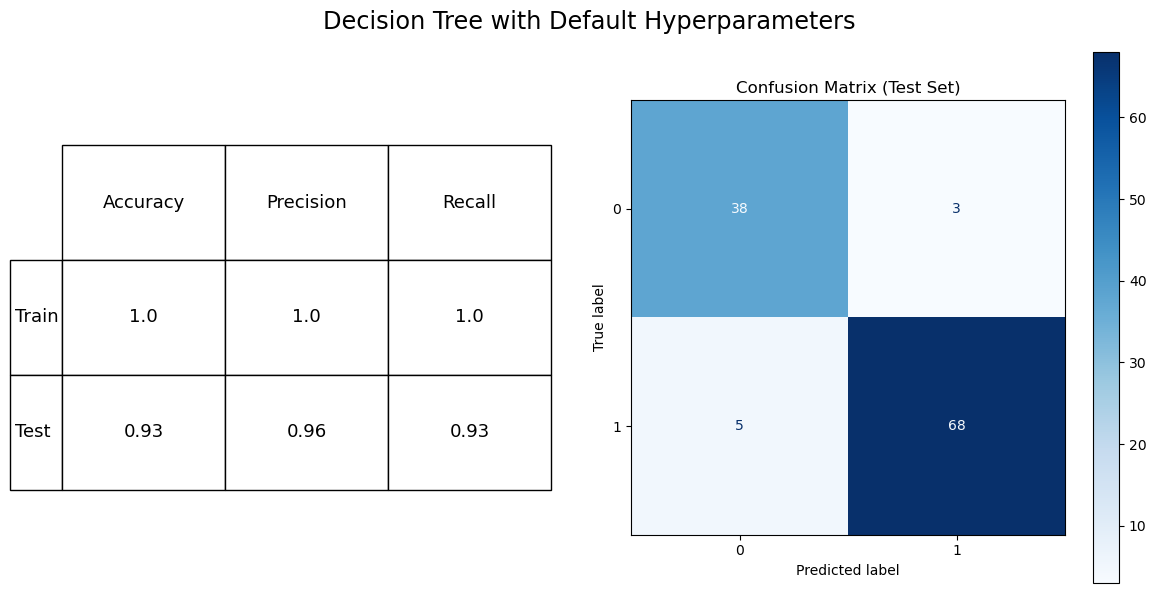

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    confusion_matrix,
)

tree_clf = DecisionTreeClassifier(random_state=5508)
tree_clf.fit(X_train, y_train)


def dt_evaluate(model, X, y, get_cm=False):
    pred = model.predict(X)
    accuracy = round(accuracy_score(y, pred), 2)
    precision = round(precision_score(y, pred), 2)  # type: ignore
    recall = round(recall_score(y, pred), 2)  # type: ignore
    if get_cm:
        cm = confusion_matrix(y, pred)
        return accuracy, precision, recall, cm

    return accuracy, precision, recall


train_accuracy, train_precision, train_recall = dt_evaluate(  # type: ignore
    tree_clf, X_train, y_train
)
test_accuracy, test_precision, test_recall, test_cm = dt_evaluate(  # type: ignore
    tree_clf, X_test, y_test, get_cm=True
)

rows = ["Train", "Test"]
columns = ["Accuracy", "Precision", "Recall"]
cell_text = [
    [train_accuracy, train_precision, train_recall],
    [test_accuracy, test_precision, test_recall],
]
plot_cm_and_table(
    "Decision Tree with Default Hyperparameters",
    "d6",
    test_cm,
    cell_text,
    rows,
    columns,
)

In [49]:
test_recall

0.93

## D8

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH / "cancer_tree.dot"),  # path differs in the book
    feature_names=X_train.columns,
    class_names=['Malignant', 'Benign'],
    rounded=True,
    filled=True
)

!dot -Tpng {IMAGES_PATH / "cancer_tree.dot"} -o {IMAGES_PATH / "d8_cancer_tree.png"}

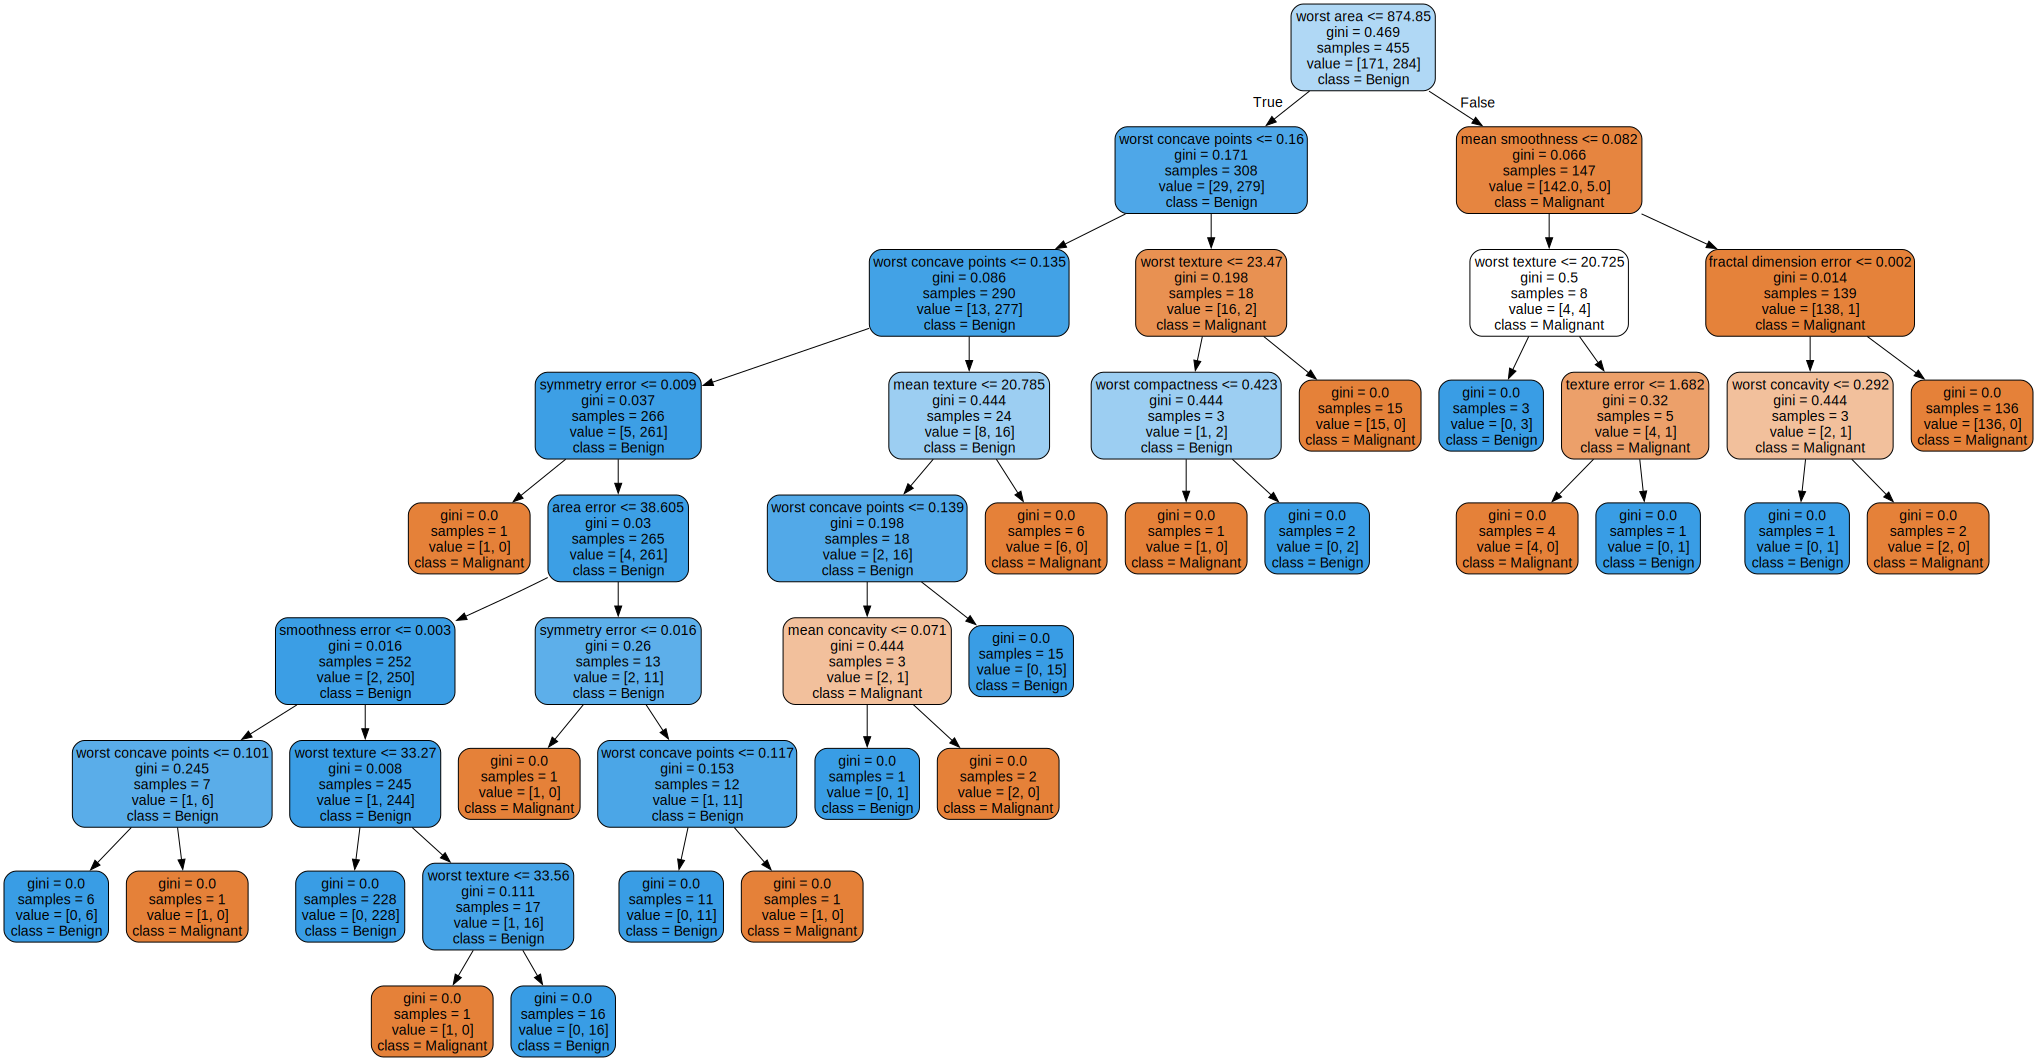

In [51]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "cancer_tree.dot")

## D10

In [52]:
def split_train_evaluate(seed, split_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=split_size, random_state=seed
    )
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    test_accuracy, test_precision, test_recall = dt_evaluate(  # type: ignore
        tree_clf, X_test, y_test
    )
    return test_accuracy, test_precision, test_recall


test_accuracy1, test_precision1, test_recall1 = split_train_evaluate(5509)
test_accuracy2, test_precision2, test_recall2 = split_train_evaluate(5510)
test_accuracy3, test_precision3, test_recall3 = split_train_evaluate(5511)
test_accuracy4, test_precision4, test_recall4 = split_train_evaluate(5512)

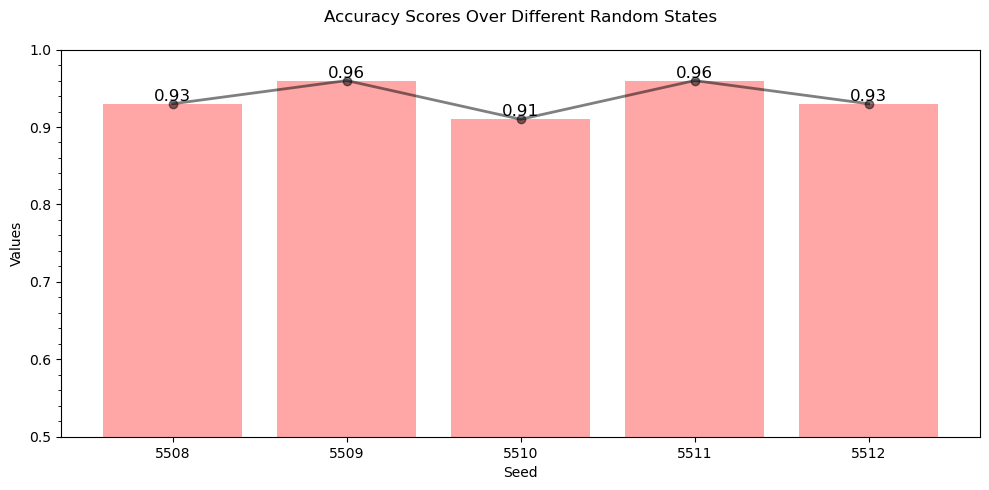

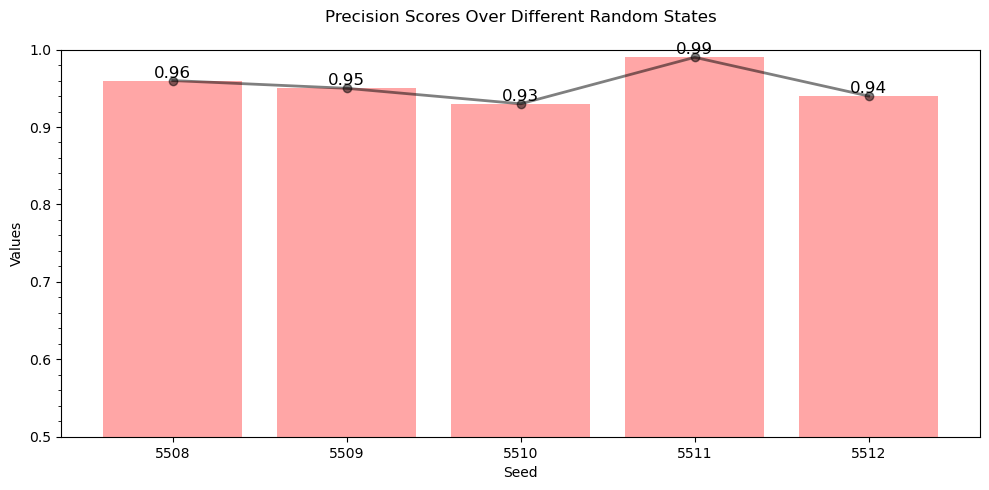

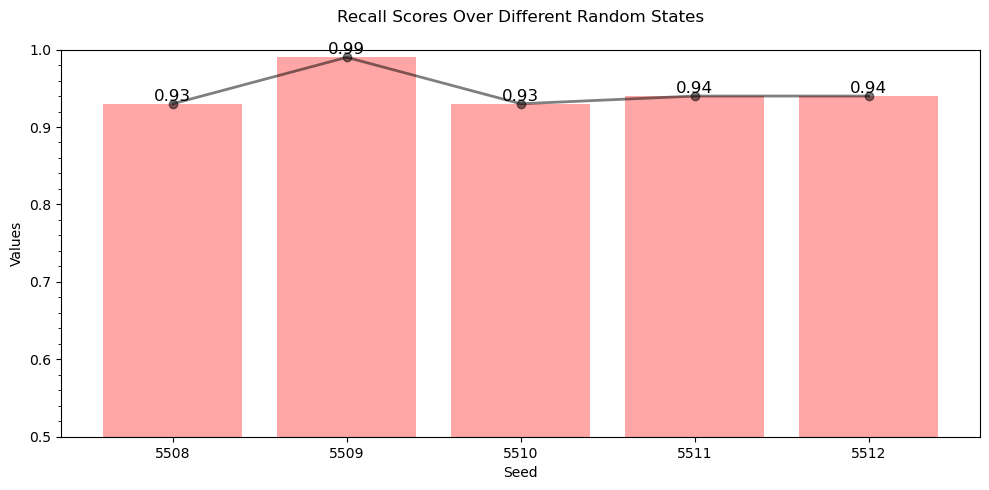

In [53]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
from matplotlib.ticker import AutoMinorLocator


def plot_barchart(fig_name, fig_title, categories, values, xlabel, ylabel="Values"):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.bar(categories, values, color="red", alpha=0.35)
    plt.plot(range(5), values, "k-", linewidth=2, marker="o", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(fig_title, y=1.05)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_ylim([0.5, 1])

    for a, b in zip(range(5), values):
        plt.text(a, b, b, ha="center", va="bottom", fontsize=12)

    save_fig(fig_name)
    plt.show()


accuracies = [
    test_accuracy,
    test_accuracy1,
    test_accuracy2,
    test_accuracy3,
    test_accuracy4,
]
precisions = [
    test_precision,
    test_precision1,
    test_precision2,
    test_precision3,
    test_precision4,
]
recalls = [test_recall, test_recall1, test_recall2, test_recall3, test_recall4]

categories = ["5508", "5509", "5510", "5511", "5512"]
plot_barchart(
    "d10_accuracy",
    "Accuracy Scores Over Different Random States",
    categories,
    accuracies,
    "Seed",
)
plot_barchart(
    "d10_precision",
    "Precision Scores Over Different Random States",
    categories,
    precisions,
    "Seed",
)
plot_barchart(
    "d10_recall",
    "Recall Scores Over Different Random States",
    categories,
    recalls,
    "Seed",
)

## D11

In [54]:
test_accuracy5, test_precision5, test_recall5 = split_train_evaluate(5508, 0.5)
test_accuracy6, test_precision6, test_recall6 = split_train_evaluate(5508, 0.4)
test_accuracy7, test_precision7, test_recall7 = split_train_evaluate(5508, 0.3)
test_accuracy8, test_precision8, test_recall8 = split_train_evaluate(5508, 0.2)
test_accuracy9, test_precision9, test_recall9 = split_train_evaluate(5508, 0.1)

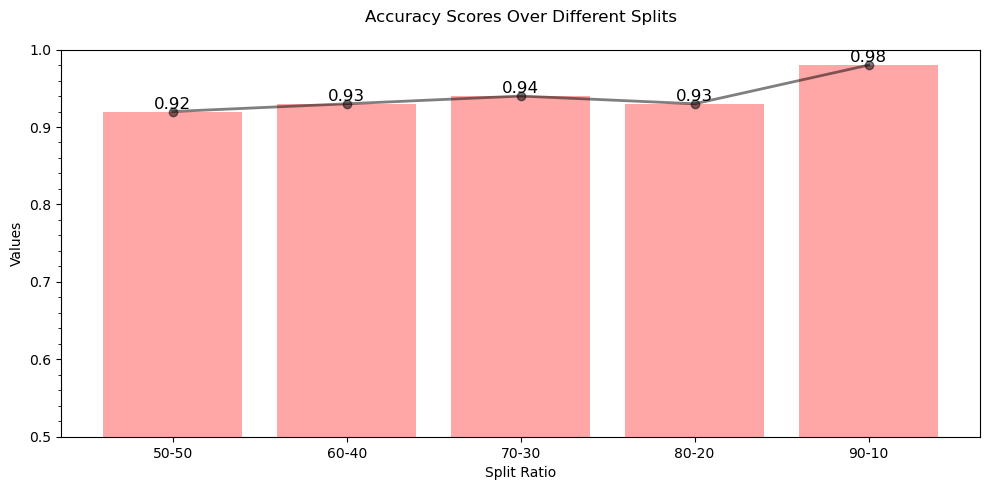

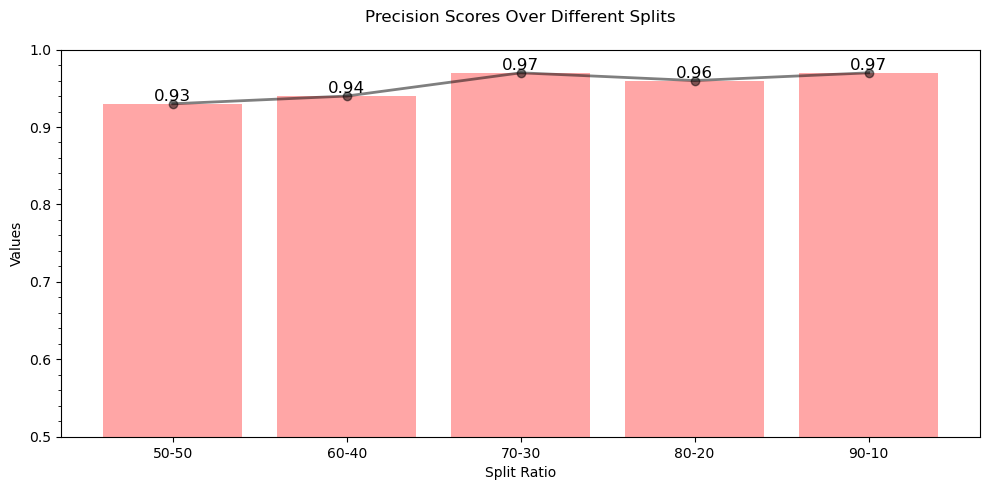

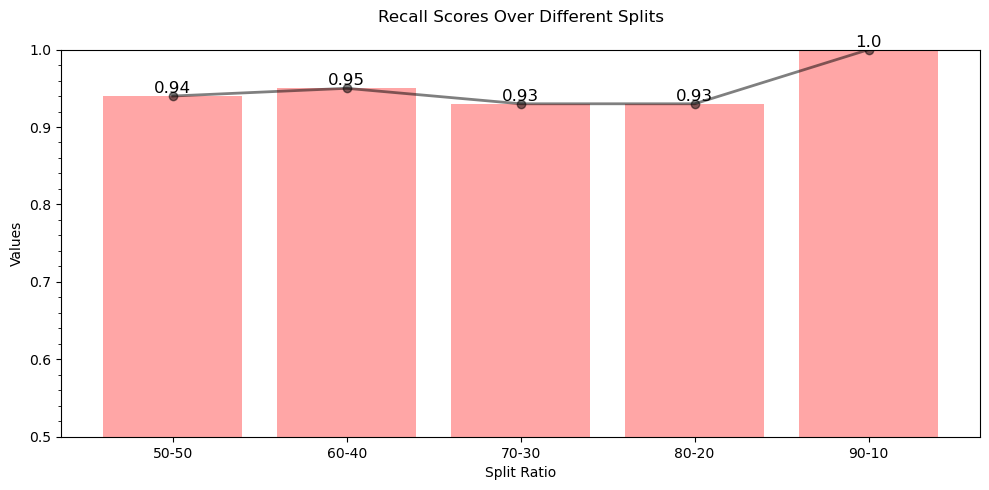

In [55]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
from matplotlib.ticker import AutoMinorLocator

accuracies = [
    test_accuracy5,
    test_accuracy6,
    test_accuracy7,
    test_accuracy8,
    test_accuracy9,
]
precisions = [
    test_precision5,
    test_precision6,
    test_precision7,
    test_precision8,
    test_precision9,
]
recalls = [test_recall5, test_recall6,
           test_recall7, test_recall8, test_recall9]

categories = ["50-50", "60-40", "70-30", "80-20", "90-10"]
plot_barchart(
    "d11_accuracy",
    "Accuracy Scores Over Different Splits",
    categories,
    accuracies,
    "Split Ratio",
)
plot_barchart(
    "d11_precision",
    "Precision Scores Over Different Splits",
    categories,
    precisions,
    "Split Ratio",
)
plot_barchart(
    "d11_recall",
    "Recall Scores Over Different Splits",
    categories,
    recalls,
    "Split Ratio",
)

# Fitting Decision Tree Models with Optimal Hyperparameters

## D12

Fitting 10 folds for each of 32 candidates, totalling 320 fits
When scoring='accuracy' The optimal hyperparameters are: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


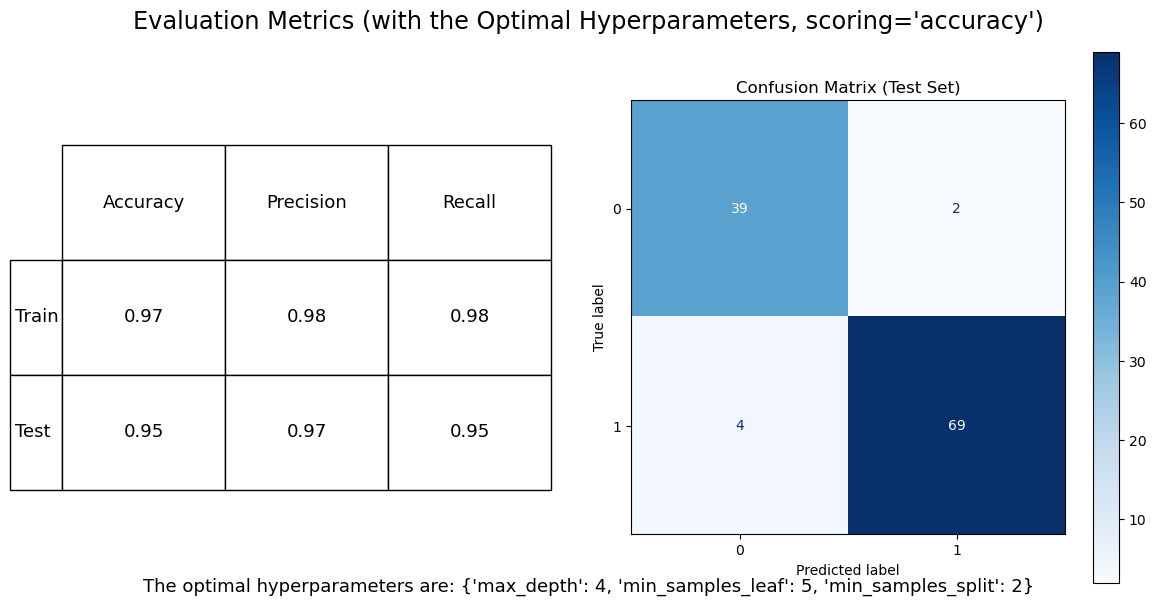

In [56]:
from sklearn.model_selection import GridSearchCV


params = [
    {
        "max_depth": [2, 3, 4, 5],
        "min_samples_split": [2, 4, 5, 10],
        "min_samples_leaf": [2, 5],
    }
]

tree_clf = DecisionTreeClassifier(random_state=5508)
gs_clf1 = GridSearchCV(
    tree_clf, params, cv=10, scoring="accuracy", n_jobs=-1, verbose=1
)
gs_clf1.fit(X_train, y_train)

optimal_hyperparameters_accuracy = "The optimal hyperparameters are: " + str(
    gs_clf1.best_params_
)

print("When scoring='accuracy'", optimal_hyperparameters_accuracy)

tree_clf_optimal_accuracy = DecisionTreeClassifier(
    random_state=5508, max_depth=4, min_samples_leaf=5, min_samples_split=2
)
tree_clf_optimal_accuracy.fit(X_train, y_train)

train_accuracy0, train_precision0, train_recall0 = dt_evaluate(  # type: ignore
    tree_clf_optimal_accuracy, X_train, y_train
)
test_accuracy0, test_precision0, test_recall0, test_cm1 = dt_evaluate(  # type: ignore
    tree_clf_optimal_accuracy, X_test, y_test, get_cm=True
)

rows = ["Train", "Test"]
columns = ["Accuracy", "Precision", "Recall"]
cell_text_fine_tuned = [
    [train_accuracy0, train_precision0, train_recall0],
    [test_accuracy0, test_precision0, test_recall0],
]
plot_cm_and_table(
    "Evaluation Metrics (with the Optimal Hyperparameters, scoring='accuracy')",
    "d12",
    test_cm1,
    cell_text_fine_tuned,
    rows,
    columns,
    optimal_hyperparameters_accuracy,
)

## D14

In [57]:
print("When scoring='accuracy',", optimal_hyperparameters_accuracy)

# -------------------------------------------------------------------------
gs_clf2 = GridSearchCV(
    tree_clf, params, cv=10, scoring="precision", n_jobs=-1, verbose=0
)
gs_clf2.fit(X_train, y_train)

print(
    "When scoring='precision', the optimal hyperparameters are: ", gs_clf2.best_params_
)

tree_clf_optimal_precision = DecisionTreeClassifier(
    random_state=5508, max_depth=5, min_samples_leaf=2, min_samples_split=2
)
tree_clf_optimal_precision.fit(X_train, y_train)
y_pred2 = tree_clf_optimal_precision.predict(X_test)
test_cm2 = confusion_matrix(y_test, y_pred2)

# -------------------------------------------------------------------------
gs_clf3 = GridSearchCV(tree_clf, params, cv=10, scoring="recall", n_jobs=-1, verbose=0)
gs_clf3.fit(X_train, y_train)

print("When scoring='recall', the optimal hyperparameters are: ", gs_clf3.best_params_)
tree_clf_optimal_recall = DecisionTreeClassifier(
    random_state=5508, max_depth=3, min_samples_leaf=5, min_samples_split=2
)
tree_clf_optimal_recall.fit(X_train, y_train)
y_pred3 = tree_clf_optimal_recall.predict(X_test)
test_cm3 = confusion_matrix(y_test, y_pred3)

When scoring='accuracy', The optimal hyperparameters are: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
When scoring='precision', the optimal hyperparameters are:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
When scoring='recall', the optimal hyperparameters are:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


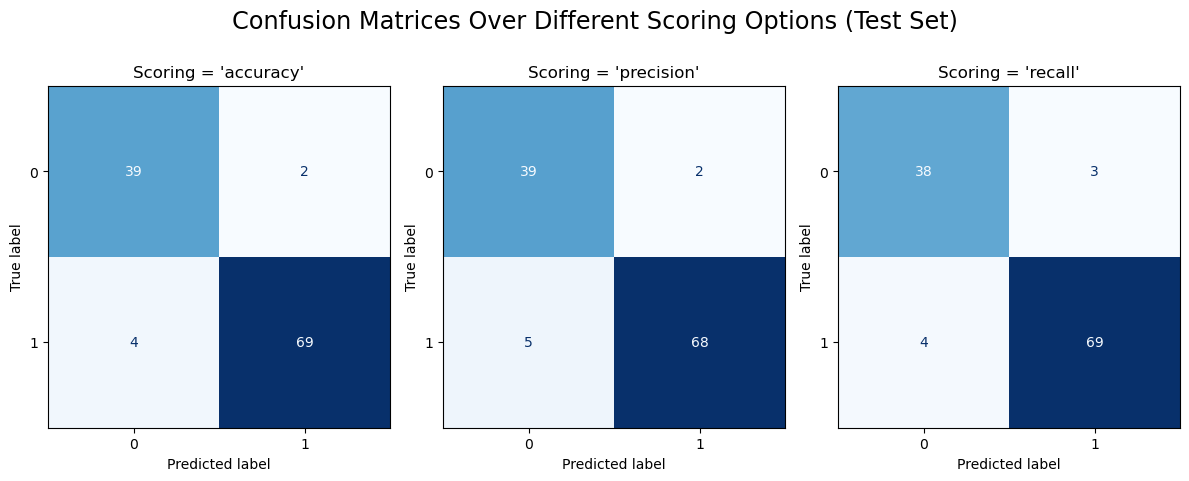

In [58]:
# plot confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=test_cm1, display_labels=[0, 1])
disp.plot(ax=ax1, cmap="Blues", colorbar=False)
ax1.set_title("Scoring = 'accuracy'")

disp = ConfusionMatrixDisplay(confusion_matrix=test_cm2, display_labels=[0, 1])
disp.plot(ax=ax2, cmap="Blues", colorbar=False)
ax2.set_title("Scoring = 'precision'")


disp = ConfusionMatrixDisplay(confusion_matrix=test_cm3, display_labels=[0, 1])
disp.plot(ax=ax3, cmap="Blues", colorbar=False)
ax3.set_title("Scoring = 'recall'")
fig.suptitle(
    "Confusion Matrices Over Different Scoring Options (Test Set)",
    fontsize="xx-large",
    y=0.88,
)

save_fig("d14")
plt.show()

# Fitting Decision Tree Models with a Reduced Feature Set

## D15

In [59]:
# model with fine-tuned hyperparameters based on accuracy (the one obtained in D12)
tree_clf = DecisionTreeClassifier(
    random_state=5508, max_depth=4, min_samples_leaf=5, min_samples_split=2
)
tree_clf.fit(X_train, y_train)
feature_importances = tree_clf.feature_importances_

combined = list(zip(X_train.columns, feature_importances))
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
sorted_features = [item[0] for item in sorted_combined]
print(sorted_combined)

[('worst area', 0.7814242280215805), ('worst concave points', 0.14724910480674872), ('mean texture', 0.03673444814982755), ('mean smoothness', 0.018980386249929704), ('area error', 0.013619847858752832), ('smoothness error', 0.0019919849131605862), ('mean area', 0.0), ('mean compactness', 0.0), ('mean concavity', 0.0), ('mean concave points', 0.0), ('mean symmetry', 0.0), ('mean fractal dimension', 0.0), ('texture error', 0.0), ('perimeter error', 0.0), ('compactness error', 0.0), ('concavity error', 0.0), ('concave points error', 0.0), ('symmetry error', 0.0), ('fractal dimension error', 0.0), ('worst texture', 0.0), ('worst smoothness', 0.0), ('worst compactness', 0.0), ('worst concavity', 0.0), ('worst symmetry', 0.0), ('worst fractal dimension', 0.0)]


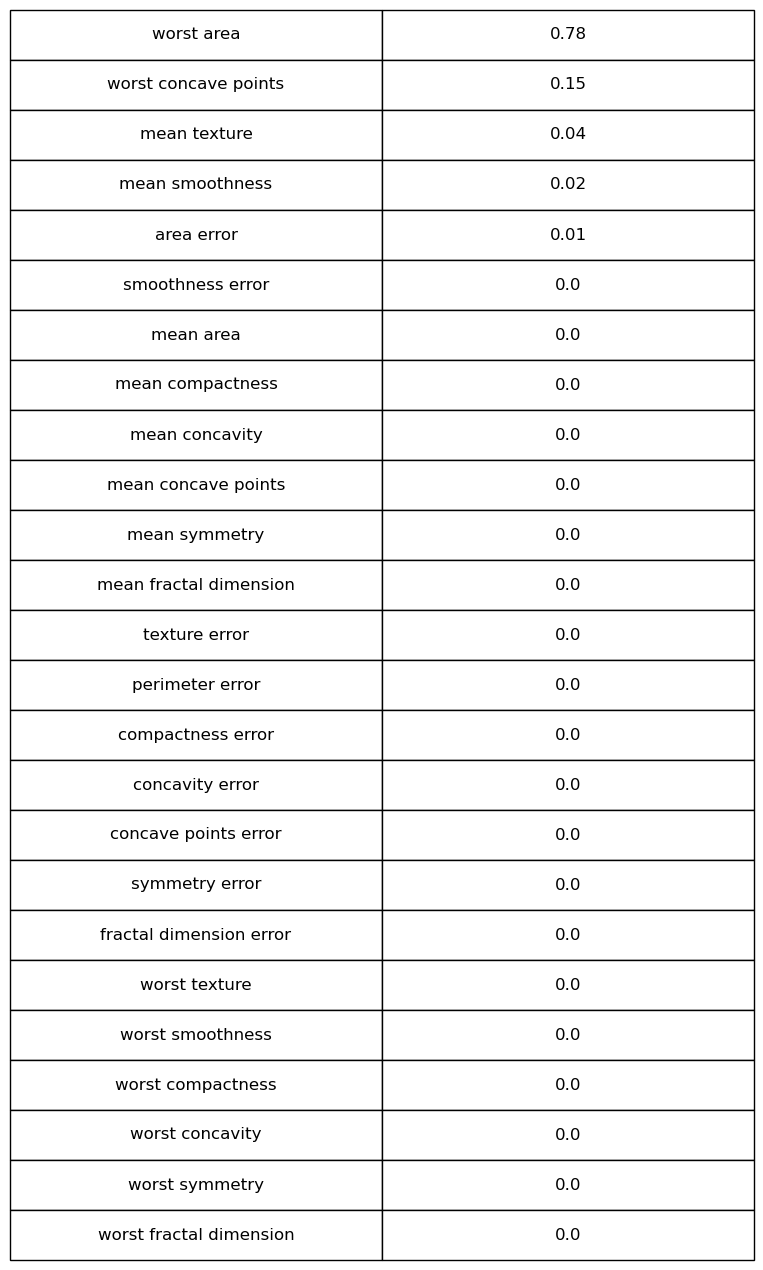

In [60]:
# Plot
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis("off")
# ax.axis('tight')

table_content = [list((t[0], round(t[1], 2))) for t in sorted_combined]

table = ax.table(cellText=table_content, loc="center", cellLoc="center")
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust cell heights and widths
table.scale(1.5, 3)
save_fig("d15", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

## D16

In [61]:
from sklearn.feature_selection import SelectFromModel


selector = SelectFromModel(tree_clf, threshold=0.01)
selector.fit(X_train, y_train)
mask = selector.get_support()
selected_features = list(X_train.columns[mask])
unselected_features = list(X_train.columns[[not x for x in mask]])

print("Retained features: ", selected_features)
print()
print("Removed features: ", unselected_features)

Retained features:  ['mean texture', 'mean smoothness', 'area error', 'worst area', 'worst concave points']

Removed features:  ['mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


In [62]:
feature_dict = dict(sorted_combined)
total_importance = 0
for feature in selected_features:
    total_importance += feature_dict[feature]
print("total feature importance value: ", total_importance)

total feature importance value:  0.9980080150868392


## D17

In [63]:
reduced_X_train = selector.transform(X_train)
reduced_X_test = selector.transform(X_test)

In [64]:
def plot_2tables(
    figure_title,
    figure_name,
    table_content1,
    row_labels1,
    col_labels1,
    table_content2,
    row_labels2,
    col_labels2,
):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.axis("off")

    ax1.axis("tight")

    ax1.margins(x=0, y=0)

    table1 = ax1.table(
        cellText=table_content1,
        rowLabels=row_labels1,
        colLabels=col_labels1,
        loc="center",
        cellLoc="center",
    )

    # Adjust font size

    table1.auto_set_font_size(False)

    table1.set_fontsize(13)

    # Adjust cell heights and widths

    table1.scale(0.8, 6)

    ax1.set_title("Using All Features", fontsize=16, y=0.85)

    ax2.axis("off")

    ax2.axis("tight")

    ax2.margins(x=0, y=0)

    table2 = ax2.table(
        cellText=table_content2,
        rowLabels=row_labels2,
        colLabels=col_labels2,
        loc="center",
        cellLoc="center",
    )

    # Adjust font size

    table2.auto_set_font_size(False)

    table2.set_fontsize(13)

    # Adjust cell heights and widths

    table2.scale(0.8, 6)

    ax2.set_title("Using Selected Features", fontsize=16, y=0.85)

    fig.suptitle(figure_title, fontsize="xx-large", y=0.95)

    save_fig(figure_name, tight_layout=True,
             bbox_inches="tight", pad_inches=0.05)

    plt.show()

### Without New Cross-Validation

In [70]:
# model with fine-tuned hyperparameters based on accuracy (the one obtained in D12)
reduced_tree_clf = DecisionTreeClassifier(
    random_state=5508, max_depth=4, min_samples_leaf=5, min_samples_split=2
)
reduced_tree_clf.fit(reduced_X_train, y_train)

reduced_train_accuracy, reduced_train_precision, reduced_train_recall = dt_evaluate(  # type: ignore
    reduced_tree_clf, reduced_X_train, y_train
)
reduced_test_accuracy, reduced_test_precision, reduced_test_recall, reduced_test_cm = dt_evaluate(  # type: ignore
    reduced_tree_clf, reduced_X_test, y_test, get_cm=True
)

rows = ["Train", "Test"]
columns = ["Accuracy", "Precision", "Recall"]
cell_text_reduced = [
    [reduced_train_accuracy, reduced_train_precision, reduced_train_recall],
    [reduced_test_accuracy, reduced_test_precision, reduced_test_recall],
]

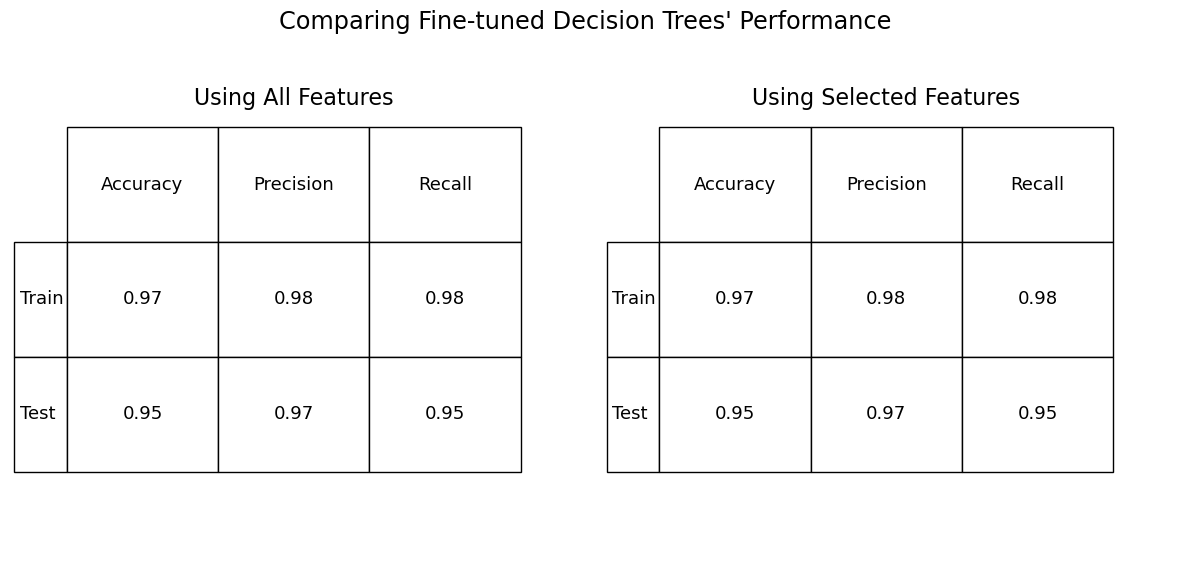

In [71]:
plot_2tables(
    "Comparing Fine-tuned Decision Trees' Performance",
    "d17_tables",
    cell_text_fine_tuned,
    rows,
    columns,
    cell_text_reduced,
    rows,
    columns,
)

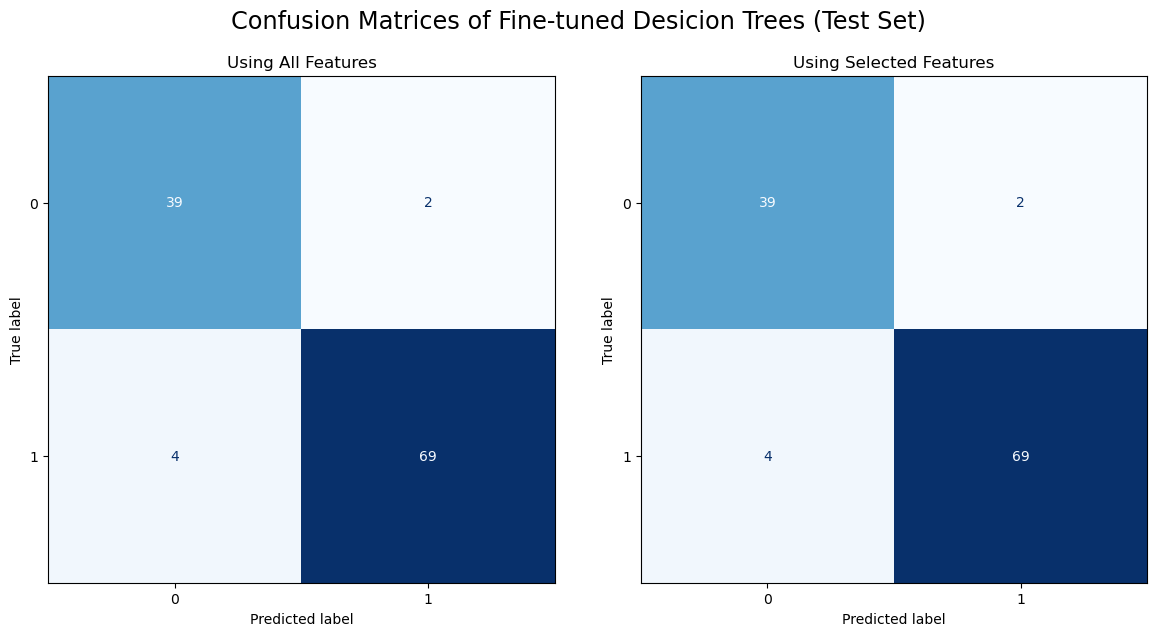

In [72]:
# plot two confusion matrices on the test sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


disp = ConfusionMatrixDisplay(confusion_matrix=test_cm1, display_labels=[0, 1])
disp.plot(ax=ax1, cmap="Blues", colorbar=False)
ax1.set_title("Using All Features")

disp = ConfusionMatrixDisplay(
    confusion_matrix=reduced_test_cm, display_labels=[0, 1])
disp.plot(ax=ax2, cmap="Blues", colorbar=False)
ax2.set_title("Using Selected Features")

fig.suptitle(
    "Confusion Matrices of Fine-tuned Desicion Trees (Test Set)",
    fontsize="xx-large",
    y=1.02,
)
save_fig("d17_confusion_matrices")
plt.show()

In [73]:
# https://www.geeksforgeeks.org/feature-selection-using-decision-tree/
# https://www.geeksforgeeks.org/decision-tree-introduction-example/

# Fitting a Random Forest

## D19

Fitting 10 folds for each of 20 candidates, totalling 200 fits
When scoring='accuracy', the optimal hyperparameters:  {'max_depth': 4, 'n_estimators': 20}


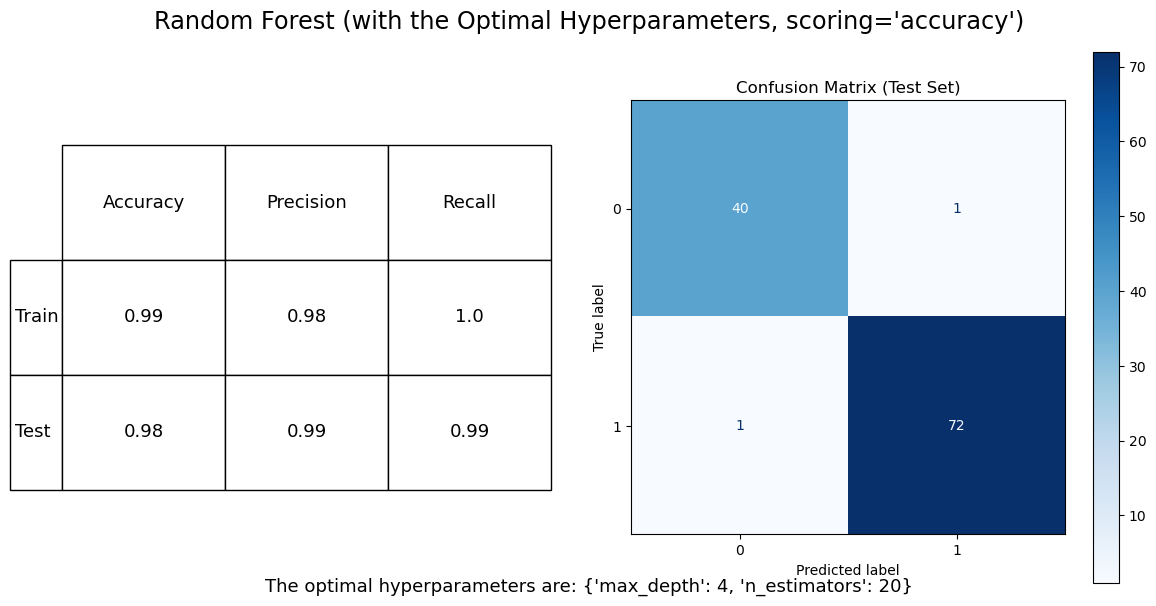

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_params = [{"n_estimators": [10, 20, 50, 100, 1000], "max_depth": [2, 3, 4, 5]}]

rf_clf = RandomForestClassifier(random_state=5508)
gs_rf_clf = GridSearchCV(
    rf_clf, rf_params, cv=10, scoring="accuracy", n_jobs=-1, verbose=1
)
gs_rf_clf.fit(X_train, y_train)
print("When scoring='accuracy', the optimal hyperparameters: ", gs_rf_clf.best_params_)

optimal_hyperparameters_rf = "The optimal hyperparameters are: " + str(
    gs_rf_clf.best_params_
)


rf_clf_optimal = RandomForestClassifier(
    random_state=5508, n_estimators=20, max_depth=4, n_jobs=-1
)
rf_clf_optimal.fit(X_train, y_train)

rf_train_accuracy, rf_train_precision, rf_train_recall = dt_evaluate(  # type: ignore
    rf_clf_optimal, X_train, y_train
)
rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_cm1 = dt_evaluate(  # type: ignore
    rf_clf_optimal, X_test, y_test, get_cm=True
)

rows = ["Train", "Test"]
columns = ["Accuracy", "Precision", "Recall"]
cell_text_rf = [
    [rf_train_accuracy, rf_train_precision, rf_train_recall],
    [rf_test_accuracy, rf_test_precision, rf_test_recall],
]
plot_cm_and_table(
    "Random Forest (with the Optimal Hyperparameters, scoring='accuracy')",
    "d19",
    rf_test_cm1,
    cell_text_rf,
    rows,
    columns,
    optimal_hyperparameters_rf,
)